Практическая работа 1.1


##################################################
ЗАДАНИЕ 1: Подготовка DataFrame

Список столбцов в данных:
 ['char_freq_#' 'capital_run_length_average' 'capital_run_length_longest'
 'capital_run_length_total' 'is_spam']

Первые записи:
    word_freq_make  word_freq_address  word_freq_all  word_freq_3d  \
0            0.00               0.64           0.64           0.0   
1            0.21               0.28           0.50           0.0   
2            0.06               0.00           0.71           0.0   

   word_freq_our  word_freq_over  word_freq_remove  word_freq_internet  \
0           0.32            0.00              0.00                0.00   
1           0.14            0.28              0.21                0.07   
2           1.23            0.19              0.19                0.12   

   word_freq_order  word_freq_mail  ...  char_freq_;  char_freq_(  \
0             0.00            0.00  ...         0.00        0.000   
1             0.00            0.94  ...        

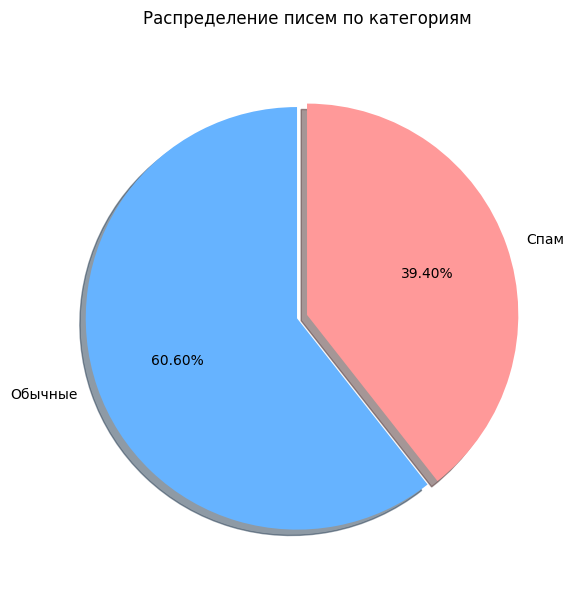


##################################################
ЗАДАНИЕ 3: Разбиение данных

Размеры выборок при разбиении 80/20:
Обучающая: 3680 записей
Тестовая: 921 записей

Размеры выборок при разбиении 70/30:
Обучающая: 3220 записей
Тестовая: 1381 записей


In [2]:
# Импорт необходимых библиотек
import pandas as pd
from urllib import request as url_req
from matplotlib import pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit as SSSplit

##########################################################################
### ЗАДАНИЕ 1: Загрузка и подготовка данных в формате DataFrame ###
print("\n" + "#"*50)
print("ЗАДАНИЕ 1: Подготовка DataFrame\n")

# Источники данных
DATA_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
NAMES_URL = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names"

# Чтение основных данных
email_data = pd.read_csv(DATA_URL, header=None)

# Получение названий признаков
with url_req.urlopen(NAMES_URL) as response:
    names_content = response.read().decode('utf-8')

# Обработка названий признаков
feature_names = []
for row in names_content.split('\n'):
    if ":" in row and not row.startswith("|"):
        feature_name = row.split(":")[0].strip()
        feature_names.append(feature_name)
feature_names += ["is_spam"]  # Целевая переменная

# Назначение имен столбцам
email_data.columns = feature_names

# Вывод информации о данных
print("Список столбцов в данных:\n", email_data.columns.values[-5:])
print("\nПервые записи:\n", email_data.iloc[:3])

##########################################################################
### ЗАДАНИЕ 2: Анализ баланса классов ###
print("\n" + "#"*50)
print("ЗАДАНИЕ 2: Анализ сбалансированности классов\n")

# Расчет распределения классов
class_balance = email_data["is_spam"].value_counts(normalize=True)
print("Процентное соотношение классов:\n", class_balance)

# Графическое представление
plt.figure(figsize=(6, 6))
plt.pie(
    class_balance,
    explode=[0.05, 0],
    labels=["Обычные", "Спам"],
    shadow=True,
    startangle=90,
    colors=["#66b3ff", "#ff9999"],
    autopct="%1.2f%%"
)
plt.title("Распределение писем по категориям", pad=20)
plt.tight_layout()
plt.show()

##########################################################################
### ЗАДАНИЕ 3: Разделение данных на обучающую и тестовую выборки ###
print("\n" + "#"*50)
print("ЗАДАНИЕ 3: Разбиение данных\n")

# Инициализация разделителя
stratified_splitter = SSSplit(n_splits=1, random_state=42)

# Разделение 80/20
stratified_splitter = SSSplit(n_splits=1, test_size=0.2, random_state=42)
for train_indices, test_indices in stratified_splitter.split(email_data, email_data["is_spam"]):
    train_set_80 = email_data.iloc[train_indices]
    test_set_20 = email_data.iloc[test_indices]

# Разделение 70/30
stratified_splitter = SSSplit(n_splits=1, test_size=0.3, random_state=42)
for train_indices, test_indices in stratified_splitter.split(email_data, email_data["is_spam"]):
    train_set_70 = email_data.iloc[train_indices]
    test_set_30 = email_data.iloc[test_indices]

# Вывод размеров выборок
print("Размеры выборок при разбиении 80/20:")
print(f"Обучающая: {len(train_set_80)} записей")
print(f"Тестовая: {len(test_set_20)} записей\n")

print("Размеры выборок при разбиении 70/30:")
print(f"Обучающая: {len(train_set_70)} записей")
print(f"Тестовая: {len(test_set_30)} записей")